In [87]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# EDIT THIS CODE TO LOAD THE SAVED DF FROM THE LAST HOMEWORK
test_labels = pd.read_csv('test_labels.csv')
test_time_series = pd.read_csv('test_time_series.csv')
train_labels = pd.read_csv('train_labels.csv')
train_time_series = pd.read_csv('train_time_series.csv')
train_label=train_labels[["label"]]
covariate_train=train_time_series[["timestamp","x","y","z"]]
covariate_train = covariate_train.replace([np.inf, -np.inf], np.nan)
covariate_train = covariate_train.dropna()
covariate_train=covariate_train[0:375]
forest_classifier=RandomForestClassifier(max_depth=4,random_state=0)
logistic_regression = LogisticRegression()
train_time_series



Unnamed: 0      timestamp                 UTC time accuracy         x  \
0          20586  1565109930787  2019-08-06T16:45:30.787  unknown -0.006485   
1          20587  1565109930887  2019-08-06T16:45:30.887  unknown -0.066467   
2          20588  1565109930987  2019-08-06T16:45:30.987  unknown -0.043488   
3          20589  1565109931087  2019-08-06T16:45:31.087  unknown -0.053802   
4          20590  1565109931188  2019-08-06T16:45:31.188  unknown -0.054031   
...          ...            ...                      ...      ...       ...   
3739       24325  1565110305638  2019-08-06T16:51:45.638  unknown  0.024384   
3740       24326  1565110305738  2019-08-06T16:51:45.738  unknown  0.487228   
3741       24327  1565110305838  2019-08-06T16:51:45.838  unknown  0.369446   
3742       24328  1565110305939  2019-08-06T16:51:45.939  unknown  0.167877   
3743       24329  1565110306039  2019-08-06T16:51:46.039  unknown  0.689346   

             y         z  
0    -0.934860 -0.069046  
1    -1.015442  0.089554  
2    -1.021255  0.178467  
3    -0.987701  0.068985  
4    -1.003616  0.126450  
...        ...       ...  
3739 -0.710709  0.030304  
3740 -1.099136 -0.015213  
3741 -0.968506  0.036713  
3742 -0.802826  0.049805  
3743 -0.991043  0.034973  

[3744 rows x 7 columns]

In [69]:
def correlation(estimator, X, y):
    predictions = estimator.fit(X, y).predict(X)
    return r2_score(y, predictions)
    
def accuracy(estimator, X, y):
    predictions = estimator.fit(X, y).predict(X)
    return accuracy_score(y, predictions)

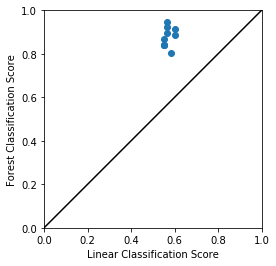

0.5686167341430499
0.8769523166891589


In [76]:
logistic_regression_scores = cross_val_score(logistic_regression,  covariate_train, train_label, cv=10, scoring=accuracy)
forest_classification_scores = cross_val_score(forest_classifier, covariate_train, train_label, cv=10, scoring=accuracy)

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(logistic_regression_scores, forest_classification_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Classification Score")
plt.ylabel("Forest Classification Score")

plt.show()
print(np.mean(logistic_regression_scores))
print(np.mean(forest_classification_scores))